In [2]:
#pip install mediapipe

  Using cached mediapipe-0.8.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32.7 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import mediapipe as mp
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [3]:
IMAGE_FILES = ['./before/Image/1.jpg'] #우진이 자는 사진 / 초상권 침해로 인한 3.jpg파일 삭제
BG_COLOR = (192, 192, 192) # gray

[[[67 64 60]
  [68 65 61]
  [71 63 63]
  ...
  [14  0  1]
  [19  3  4]
  [16  0  0]]

 [[74 71 67]
  [73 68 65]
  [74 66 66]
  ...
  [17  1  2]
  [20  2  1]
  [19  0  0]]

 [[81 76 73]
  [85 80 77]
  [84 76 76]
  ...
  [18  0  0]
  [22  1  0]
  [25  4  2]]

 ...

 [[73 65 65]
  [72 67 66]
  [74 69 68]
  ...
  [73 61 55]
  [72 62 55]
  [73 65 58]]

 [[76 70 71]
  [74 68 69]
  [74 68 69]
  ...
  [72 61 53]
  [71 62 53]
  [70 63 54]]

 [[73 67 68]
  [70 64 65]
  [69 64 65]
  ...
  [73 62 54]
  [71 62 53]
  [69 62 53]]]


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Nose coordinates: (946.6811943054199, 296.69355869293213)


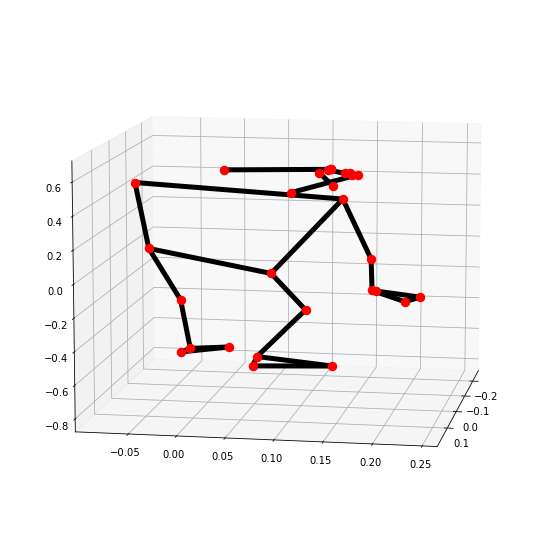

In [4]:
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    print(image)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/home/lwjeong/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)